In [ ]:
#Effect Size: the amount of effect that each feature has on the label
#Pearson Correlation: measure of effect size, indicates how much two numeric variables influence each other/overlap
    #Requires continuous data, linear relationship, homoskedastic relationship (accuracy of prediction from line of fit doesn't depend on x)

In [ ]:
import numpy as np

height = [60,62,65,68,70,74]
weight = [140,138,150,166,190,250]

np.corrcoef(height, weight)[0][1]

In [1]:
import pandas as pd
df = pd.read_csv("../Datasets/insurance.csv")
print(df.corr())
print(df.charges.corr(df.bmi))

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000
0.19834096883362892


In [2]:
from scipy import stats
r, p = stats.pearsonr(df.charges, df.age)
print(round(r, 4)) #pearson correlation coefficient
print(round(p, 29)) #p-value

0.299
5.0000000000000004e-29


In [7]:
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        r, p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df
#table of correlation and p -value between charges column and other columns

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


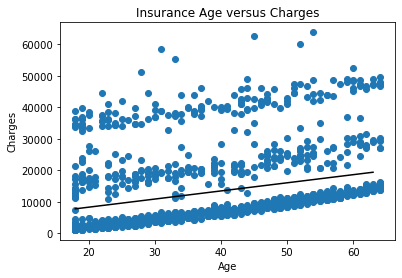

In [15]:
import matplotlib.pyplot as plt
from scipy import stats
m,b,r,p,err = stats.linregress(df.age, df.charges)

x=range(df.age.min(),df.age.max())
y=m*x+b
plt.plot(x,y, color='black') #plot a line
plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

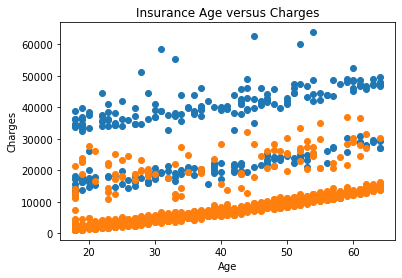

In [11]:
df_smoker = df[df['smoker']=='yes']
df_nonsmoker = df[df['smoker']=='no']

plt.scatter(df_smoker.age, df_smoker.charges, label='Smokers')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label='Non-smokers')
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

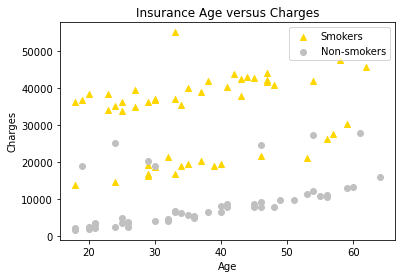

In [12]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label='Smokers', color='gold', marker='^')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label='Non-smokers', color='silver', marker='o')
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [19]:
#Measure heterostasticity : spread of y values for all values of x
#For each value x, what does the typical distribution of y look like?
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula='charges~age', data=df).fit() #ordinary least squares, y-x cols, data=df

white_test = het_white(model.resid, model.model.exog) #exog var is ind. var
breushpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breushpagan_test

output_df


,LM stat,LM p,F stat,F stat p
White,0.002713,0.998645,0.001353,0.998648
Breusch-Pagan,0.000413,0.983776,0.000413,0.983792
